# Programación Dinámica: Curva braquistócrona

[Wikipedia] Una curva braquistócrona (gr. βράχιστος brachistos 'el más corto', χρόνος chronos 'intervalo de tiempo'), o curva del descenso más rápido,1​ es la curva entre dos puntos que es recorrida en menor tiempo por un cuerpo que comienza en el punto inicial con velocidad cero, y que debe desplazarse a lo largo de la curva hasta llegar al segundo punto, bajo acción de una fuerza de gravedad constante y suponiendo que no existe fricción.

In [ ]:
# Acceleration due to gravity (m.s-2); final position of bead (m).
g = 9.81
x1, y1 = 0, 0
x2, y2 = 1, 0.35


In [ ]:
import numpy as np
from scipy.optimize import newton

# Optimal curve, adapted from https://scipython.com/blog/the-brachistochrone-problem/

def cycloid(x2, y2, N=100):
    """
    Return the path of Brachistochrone curve from (0,0) to (x2, y2).

    The Brachistochrone curve is the path down which a bead will fall without
    friction between two points in the least time (an arc of a cycloid).
    It is returned as an array of N values of (x,y) between (0,0) and (x2,y2).
    """

    # First find theta2 from (x2, y2) numerically (by Newton-Rapheson).
    def f(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(f, np.pi/2)

    # The radius of the circle generating the cycloid.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, N)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    # The time of travel
    T = theta2 * np.sqrt(R / g)

    return x, y, T

T(cycloid) = 0.585


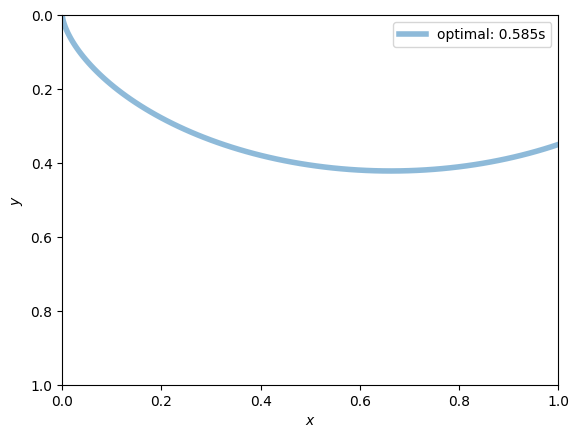

In [ ]:
x_opt, y_opt, T_opt = cycloid(x2,y2)
print('T(cycloid) = {:.3f}'.format(T_opt))

import matplotlib.pyplot as plt

# Plot a figure with the optimal curve
fig, ax = plt.subplots()
ax.plot(x_opt, y_opt, lw=4, alpha=0.5, label=f'optimal: {T_opt:.3f}s')
ax.legend()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
plt.show()

## Solución con programación dinámica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Grid

# number of intermediate points
n = 5
# define the lower and upper limits for x and y
minX, maxX = 0.0, 1.0
minY, maxY = 0.0, 1.0
# 1D arrays for x and y
x = np.linspace(minX, maxX, n+2)
y = np.linspace(minY, maxY, n+2)
# create the mesh based on these arrays
X, Y = np.meshgrid(x, y)




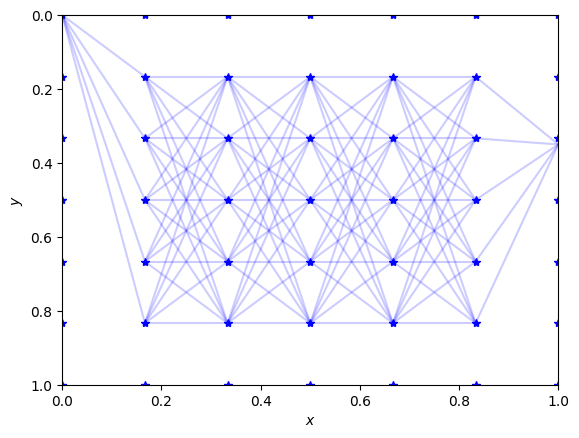

In [ ]:
def plot_grid(ax):
    ax.plot(X, Y, "*b")

def plot_graph(ax):
    for i in range(n):
        ax.plot([x[0], x[1]], [0, y[i+1]], alpha=0.2, color='b')

    for i in range(n-1):
        for s in range(n):
            for t in range(n):
                ax.plot([x[i+1], x[i+2]], [y[s+1],y[t+1]], alpha=0.2, color='b')

    for i in range(n):
        ax.plot([x[n], x[n+1]], [y[i+1], y2], alpha=0.2, color='b')

fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plot_grid(ax)
plot_graph(ax)
plt.show()

In [ ]:
def distance(xi,yi,xf,yf):
    return np.sqrt((xf-xi)*(xf-xi)+(yf-yi)*(yf-yi))

def speed(dy):
    return np.sqrt(2*g*dy)

def time(xi,yi,xf,yf):
    space = distance(xi, yi, xf, yf)
    mean_velocity = (speed(yi)+speed(yf))/2
    return space/mean_velocity

xf = x2
yf = y2

T = np.zeros((n+2,n+2)) # Time needed in the last step
S = np.zeros((n+2,n+2)) # Accumulated time
Y = np.zeros((n+2,n+2)) # Best Y position

# From (0,0) to the first step

for i in range(1,n+1):
    #print(f"(0,0)->(x_1,y_{i})")
    T[1][i] = time(x[0], y[0], x[1],y[i])
    S[1][i] = T[1][i]

# From one step to the next

for k in range(2,n+1):
    for i in range(1,n+1):

        minS = np.inf

        for j in range(1,n+1):
            #print(f"(x_{k-1},y_{j})->(x_{k},y_{i})")
            currentT = time(x[k-1], y[j], x[k], y[i])
            currentS = S[k-1][j] + currentT

            if currentS<minS:
                minS = currentS
                minT = currentT
                minY = j

        T[k][i] = minT
        S[k][i] = minS
        Y[k][i] = minY

# From the last step to the target

for i in range(1,n+1):
    #print(f"(x_{n},y_{i})->(x_f,y_f)")
    T[n+1][i] = time(x[n], y[i], xf, yf)
    S[n+1][i] = S[n][i] + T[n+1][i]

print('Last time')
print(T.T)
print('Total time')
print(S.T)
print('Predecessor')
print(Y.T)

T_dp = np.min(S[n+1][1:n])
print(f'Minimum time: {T_dp:.3f}s')

route = np.zeros(n+2)
route[0] = 0
route[n+1] = yf
pred = int(np.argmin(S[n+1][1:n]))+1

for i in range(n,0,-1):
    # print(f"{pred} @ {y[pred]}")
    route[i] = y[pred]
    pred = int(Y[i][pred])

print(route)
y_dp = route


Last time
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.2606873  0.09216688 0.09216688 0.10798021 0.10798021
  0.11188911]
 [0.         0.29145726 0.06517182 0.06517182 0.06517182 0.06517182
  0.06469801]
 [0.         0.33654585 0.08285613 0.05321257 0.05321257 0.05321257
  0.07795693]
 [0.         0.38001377 0.06985095 0.06985095 0.04608344 0.04608344
  0.11474791]
 [0.         0.42034563 0.10387361 0.06153992 0.06153992 0.04121828
  0.15343977]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Total time
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.2606873  0.35285417 0.44502105 0.52978112 0.59495294
  0.70684205]
 [0.         0.29145726 0.35662908 0.4218009  0.48697273 0.55214455
  0.61684256]
 [0.         0.33654585 0.37431339 0.42752596 0.48073853 0.5339511
  0.61190804]
 [0.         0.38001377 0.4063968  0.44416434 0.49024778 0.53633122
  0.65107913]
 [0.         0.4203

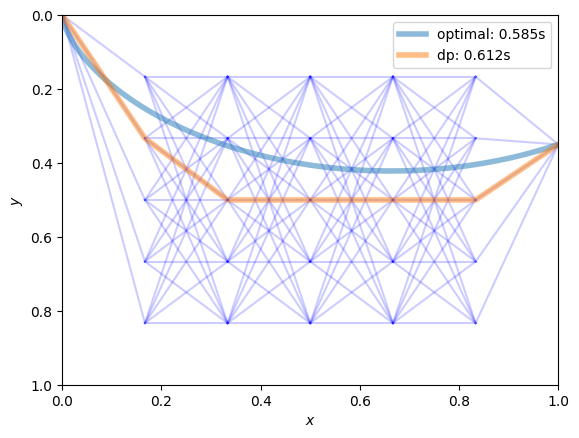

In [ ]:
# Plot

fig, ax = plt.subplots()

#plot_grid(ax)
plot_graph(ax)

ax.plot(x_opt, y_opt, lw=4, alpha=0.5, label=f'optimal: {T_opt:.3f}s')
ax.plot(x, y_dp, lw=4, alpha=0.5, label=f'dp: {T_dp:.3f}s')
ax.legend()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
plt.savefig('brachistochrone.png')
plt.show()

## Solución numérica

Christian Hill:
"Learning Scientific Programming with Python",
2nd edition, Cambridge University Press, 2020.
ISBN 9781108745918

The Brachistochrone problem
https://scipython.com/blog/the-brachistochrone-problem/


In [ ]:
import numpy as np
from scipy.integrate import quad


def linear(x2, y2, N=100):
    """Return the path of a straight line from (0,0) to (x2, y2)."""

    m = y2 / x2
    x = np.linspace(0, x2, N)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    return x, y, T


def func(x, f, fp):
    """The integrand of the time integral to be minimized for a path f(x)."""
    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))


def circle(x2, y2, N=100):
    """
    Return the path of a circular arc between (0,0) to (x2, y2).

    The circle used is the one with a vertical tangent at (0,0).
    """

    # Circle radius
    r = (x2**2 + y2**2)/2/x2

    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    return x, y, T


def parabola(x2, y2, N=100):
    """
    Return the path of a parabolic arc between (0,0) to (x2, y2).

    The parabola used is the one with a vertical tangent at (0,0).
    """

    c = (y2/x2)**2

    def f(x):
        return np.sqrt(c*x)
    def fp(x):
        return c/2/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calculate the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    return x, y, T

T(cycloid) = 0.585s
T(circle) = 0.607s
T(parabola) = 0.624s
T(linear) = 0.809s


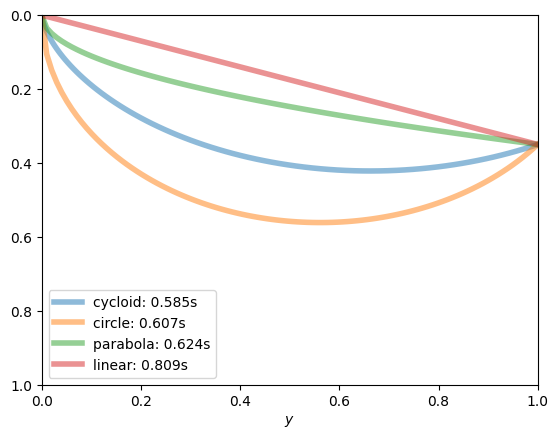

In [ ]:
import matplotlib.pyplot as plt

# Plot a figure comparing the four paths.
fig, ax = plt.subplots()

for curve in ('cycloid', 'circle', 'parabola', 'linear'):
    x, y, T = globals()[curve](x2, y2)
    print(f'T({curve}) = {T:.3f}s')
    ax.plot(x, y, lw=4, alpha=0.5, label=f'{curve}: {T:.3f}s')
ax.legend()

ax.set_xlabel('$x$')
ax.set_xlabel('$y$')
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
plt.savefig('brachistochrone.png')
plt.show()